# Moving Median

In [2]:
import datetime

import matplotlib.pyplot as plt
import mplfinance as mpf
import pandas as pd
import yfinance as yf

In [3]:
code = 'N225'
symbol = '^%s' % code
ticker = yf.Ticker(symbol)

# 週足で過去 5 年分のデータを取得
df0 = ticker.history(period='5y', interval='1wk')

# ローソク足のチャートには、そのうち過去 3 年分のみ使用する
dt_last = df0.index[len(df0) - 1]
tdelta_3y =  datetime.timedelta(days=365 * 3)
df = df0[df0.index >= dt_last - tdelta_3y]

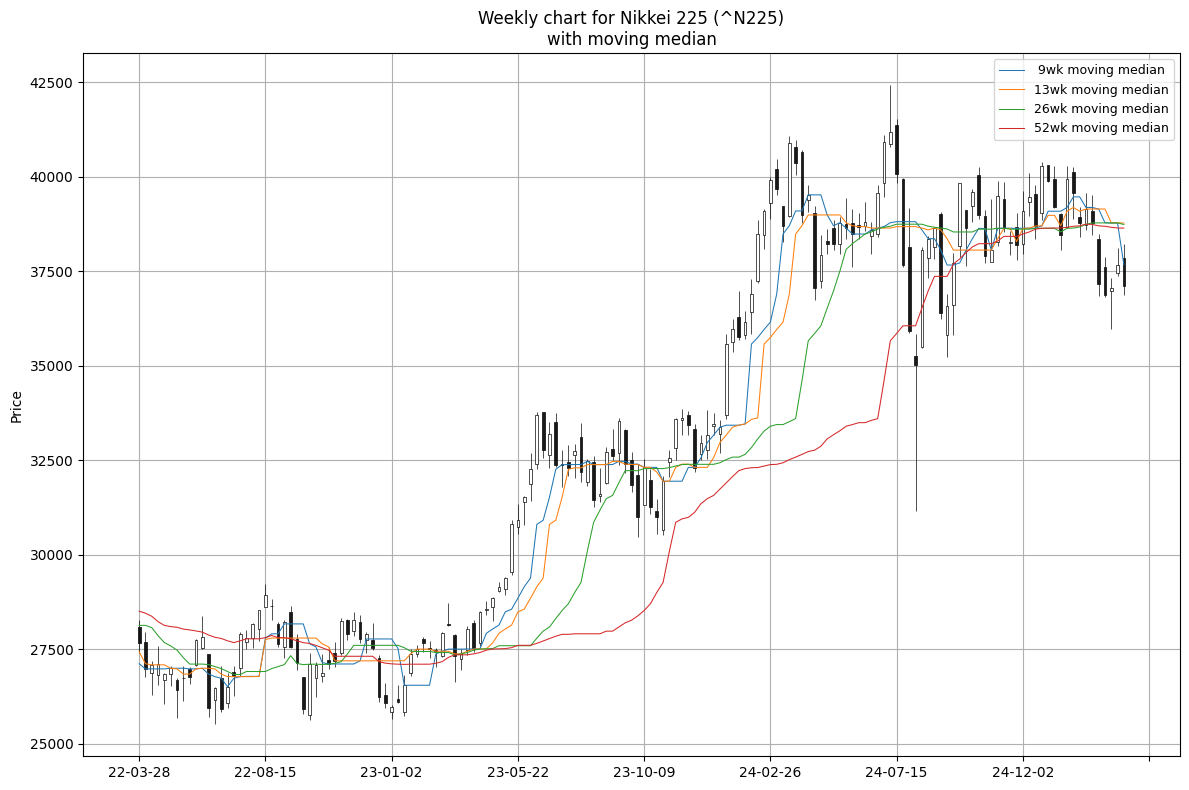

In [4]:
fig, ax = plt.subplots(figsize=(12, 8))

# 移動メジアンの算出
mv_median_09 = df0['Close'].rolling(9).median()
mv_median_13 = df0['Close'].rolling(13).median()
mv_median_26 = df0['Close'].rolling(26).median()
mv_median_52 = df0['Close'].rolling(52).median()

apds  = [
    mpf.make_addplot(mv_median_09[df.index], width=0.75, label=' 9wk moving median', ax=ax),
    mpf.make_addplot(mv_median_13[df.index], width=0.75, label='13wk moving median', ax=ax),
    mpf.make_addplot(mv_median_26[df.index], width=0.75, label='26wk moving median', ax=ax),
    mpf.make_addplot(mv_median_52[df.index], width=0.75, label='52wk moving median', ax=ax),
]

mpf.plot(
    df, type='candle', style='default',
    addplot=apds,
    datetime_format='%y-%m-%d',
    xrotation=0,
    ax=ax,
)

ax.grid()
ax.legend(loc='best', fontsize=9)

# 銘柄によっては銘柄名を取得できない場合があるので、その際には銘柄コードのみ表示
try:
    ax.set_title('Weekly chart for %s (%s)\nwith moving median' % (ticker.info['longName'], symbol))
except KeyError:
    ax.set_title('Weekly chart for %s\nwith robust moving median' % (symbol, period))

plt.tight_layout()
plt.savefig('0_report_weekly_chart_moving_median_%s.png' % code)
plt.show()